In [4]:
!pip install kagglehub

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn


In [6]:
import pandas as pd
import os

# This finds the actual CSV file inside the downloaded folder
csv_file = os.path.join(path, "WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = pd.read_csv(csv_file)

# The Cleaning Steps
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)
df.drop('customerID', axis=1, inplace=True)

print("DATA IS FINALLY LOADED AND CLEANED! ✅")
df.head()

DATA IS FINALLY LOADED AND CLEANED! ✅


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


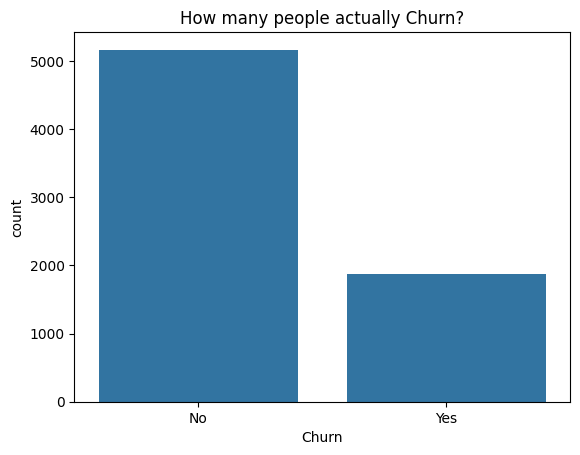

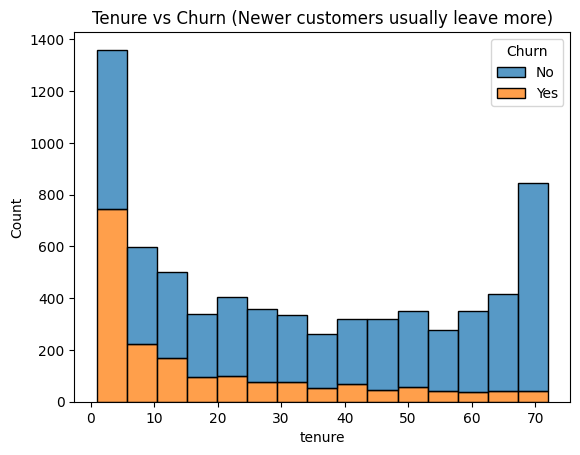

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Check the Churn Balance (Who stays vs who leaves)
sns.countplot(x='Churn', data=df)
plt.title('How many people actually Churn?')
plt.show()

# 2. Check Tenure (How long they stay)
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack')
plt.title('Tenure vs Churn (Newer customers usually leave more)')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Convert all text columns into numbers automatically
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# X = the data (Contract, MonthlyCharges, etc.), y = what we want to predict (Churn)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split: 80% to teach the AI, 20% to test it
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data is ready for training!")

Data is ready for training!


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1. Baseline Model (Logistic Regression)
baseline = LogisticRegression(max_iter=1000)
baseline.fit(X_train, y_train)
y_pred_base = baseline.predict(X_test)

# 2. Improved Model (Random Forest)
improved = RandomForestClassifier(n_estimators=100, random_state=42)
improved.fit(X_train, y_train)
y_pred_imp = improved.predict(X_test)

print("--- BASELINE RESULTS ---")
print(classification_report(y_test, y_pred_base))

print("\n--- IMPROVED RESULTS ---")
print(classification_report(y_test, y_pred_imp))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- BASELINE RESULTS ---
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407


--- IMPROVED RESULTS ---
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

